In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

We are using the wine dataset instead of iris dataset.
The Wine Quality Dataset contains data on chemical properties and sensory evaluations of red wine samples.



Initially we will load and preprocess the dataset using pandas and mentioning the directory

In [4]:

data = pd.read_csv('/Users/apple/desktop/CS/machine learning/winequality-red.csv')


Now we will sepearate features and labels, all columns except qualilty are features[we are using quality as labels]

In [5]:

features = data.drop('quality', axis=1) 
labels = data['quality']  


we will find the mean imputation ot handle the missing values in the dataset 


In [6]:

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

Normalization of features by calculating the mean and statdard deviation of the dataset

In [7]:

scaler = StandardScaler()
features = scaler.fit_transform(features)

splitting of the dataset into test[20%] and train[80%] dataset

In [8]:
 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Now we start training our model we are using linear regression

In [14]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now we are evaluating the model and calculate the mean squared error

In [15]:

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.39002514396395493


Now we are adding some data points to try to predict the results

In [16]:

new_data = np.array([[7.0, 0.65, 0.02, 2.0, 0.08, 15.0, 50.0, 0.996, 3.30, 0.6, 10.0],
                     [6.5, 0.75, 0.01, 2.5, 0.07, 20.0, 60.0, 0.995, 3.40, 0.7, 11.0]])  
new_data_scaled = scaler.transform(new_data)
new_predictions = model.predict(new_data_scaled)
print("Predictions for new data:", new_predictions)

Predictions for new data: [5.34807608 5.5878401 ]


Correlation matrix is been constructed


In [12]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

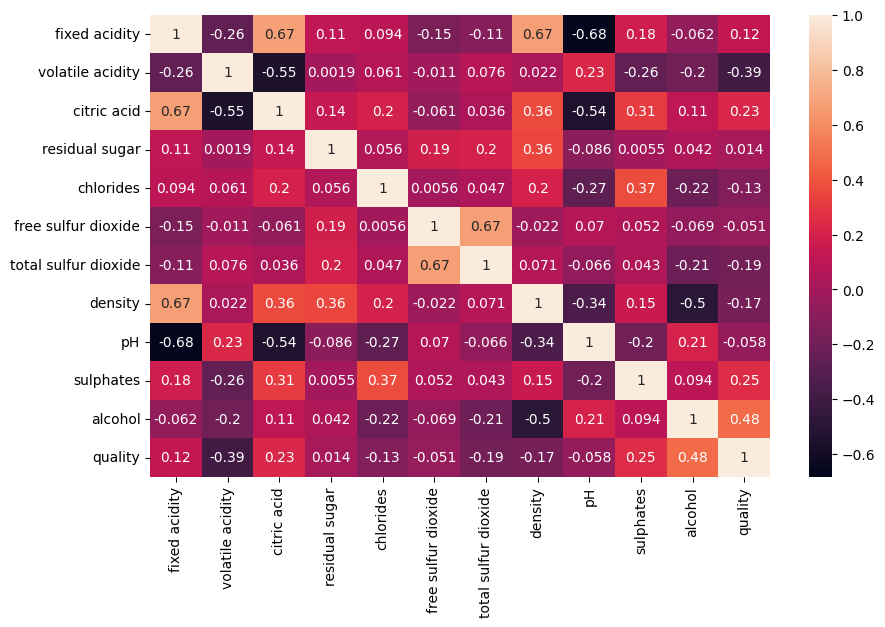

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Now we are constructing the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

Initially we will convert regression report into distinct/discrete classes

Rounding off the predinction to the nearest integer

In [18]:

predicted_classes = np.round(predictions).astype(int)

Ensuring that the classes match the actual labels 

mapping the values outside the actual range to the nearest valid class (if necessary)

In [19]:
predicted_classes = np.clip(predicted_classes, y_test.min(), y_test.max())

Calculating the confusion matrix

In [20]:

conf_matrix = confusion_matrix(y_test, predicted_classes)

Displaying the confusion matrix

In [21]:
# Step 4: Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0 91 39  0  0]
 [ 0  0 40 87  5  0]
 [ 0  0  0 37  5  0]
 [ 0  0  0  1  4  0]]


Creating a datailed classification report

In [22]:
# Optional: Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.70      0.67       130
           6       0.53      0.66      0.59       132
           7       0.36      0.12      0.18        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.25      0.25      0.24       320
weighted avg       0.53      0.57      0.54       320



/usr/local/Cellar/jupyterlab/4.3.2_1/libexec/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Cellar/jupyterlab/4.3.2_1/libexec/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Cellar/jupyterlab/4.3.2_1/libexec/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,